In [1]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')

In [2]:
df = pd.read_csv('archivos/reddit_worldnews_start_to_2016-11-22.csv')
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [3]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_en])
    return texto.split()

df['newTit'] = df['title'].apply(lambda texto: pre_procesado(texto))

df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit,newTit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,"[scores, killed, pakistan, clashes]"
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,"[japan, resumes, refuelling, mission]"
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,"[us, presses, egypt, gaza, border]"
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,"[jump, start, economy, give, health, care]"
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,"[council, europe, bashes, eu, un, terror, blac..."


In [12]:
model = Word2Vec(df['newTit'], min_count = 5)

In [32]:
model.wv.__getitem__('dog')

array([ 0.2697438 , -0.47424677,  0.5422292 ,  0.20973653, -0.34748778,
        0.6925615 , -0.16667232, -1.2969854 ,  1.0190989 ,  0.7192731 ,
        0.05378161,  0.33639422, -0.9388379 , -0.06649891,  0.24066804,
       -0.42753604,  1.5766729 , -0.35238835,  1.0708731 , -0.50297725,
       -0.48102352,  0.16802557,  0.10225948,  1.5991155 , -0.8232303 ,
        1.4664366 , -1.0111638 , -0.32530493, -0.3992257 ,  0.72588027,
       -1.4023589 , -0.189642  , -1.3209238 ,  0.4928075 ,  0.31058037,
       -0.7690346 , -2.2296712 , -1.3897579 ,  0.94270754,  0.9625713 ,
        0.282052  ,  1.3265176 , -0.06908976,  0.5477812 , -0.6797689 ,
        0.6668242 , -0.06045908,  0.62183434, -0.4418692 , -0.76599646,
       -1.2950164 ,  1.2915571 , -1.0150324 ,  0.4555406 ,  0.58455086,
        0.13733122,  0.28431046,  0.20917228, -0.16954036, -0.33718833,
        0.07404455,  2.5068712 ,  0.46237993,  0.6572935 ,  0.4631433 ,
        0.6669374 ,  0.95138234, -1.107345  , -1.7914535 , -0.92

In [36]:
model.wv.most_similar('live')

[('updates', 0.5374023914337158),
 ('broadcast', 0.5312208533287048),
 ('viewers', 0.5268039703369141),
 ('pics', 0.5234489440917969),
 ('vid', 0.5196242332458496),
 ('streaming', 0.5171962976455688),
 ('watched', 0.5106961727142334),
 ('feed', 0.510025680065155),
 ('channels', 0.5071626901626587),
 ('watch', 0.49787819385528564)]

In [22]:
from sklearn.manifold import TSNE

In [28]:
vocab = list(model.wv.vocab)
X = model[vocab]

# aplicamos TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# transformamos en DataFrame
df1 = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df1.columns = ['x', 'y', 'palabra']

<ipython-input-28-fb86f4d6d421>:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



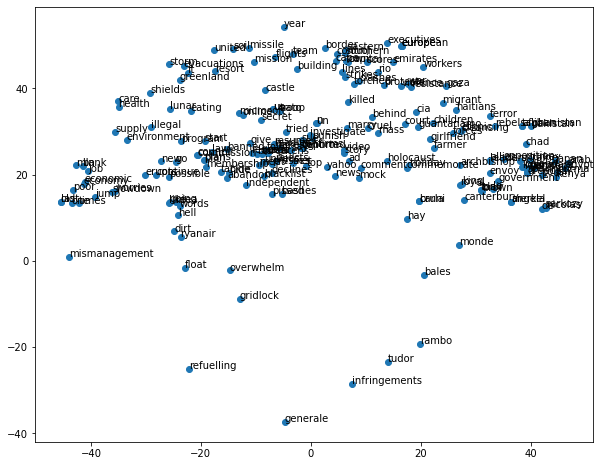

In [39]:
# creamos el gráfico
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

# reducimos el dataset a 15 palabras para el ejemplo
df_e = df1.head(200)

ax.scatter(df_e['x'], df_e['y'])

for i, txt in enumerate(df_e['palabra']):
    ax.annotate(txt, (df_e['x'].iloc[i], df_e['y'].iloc[i]))
    
plt.show()

In [ ]:
#¿Su modelo da buenos resultados? ¿Por qué sí o por qué no?

#Considero que el modelo muestra buenos resultados porque  segun lo observado al utilizar el comando model.wv.most_similar,
#se evidencian similitudes en las palabras mostradas, sin embargo hay que tener en cuenta el contexto del entrenamiento,
# porque al realizar la prueba con la palabra 'life' se observan palabras relacionadas con temas de grabación al ser una base
# de datos de noticias.


#¿Qué problemas encontró al realizar este taller?

#el principal problema es tener en cuenta el contexto, por otro lado tuve alguna dificultad al realizar la visualización y
#para finalizar se tuvo cierta dificultad al encontrar un archivo con el cual realizar el ejercicio.